In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
from matplotlib.colors import ListedColormap

In [2]:
def generateData (size, numberOfClasses, dimensional = 2):
    data = []
    for classNum in range(numberOfClasses):
        center = [random.random()*5.0 for i in range(dimensional)]
        for rowNum in range(size):
            data.append([ [random.gauss(center[i],0.5) for i in range(dimensional)], classNum])
    return data

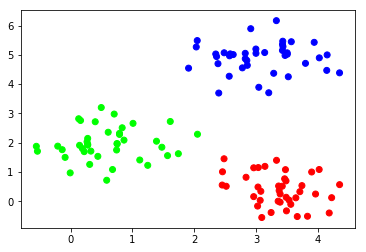

In [3]:
def showData (trainData, nClasses, nItemsInClass):
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    plt.show() 
size = 40
nClasses = 3
data = generateData (size, nClasses)
showData (data, nClasses, size)

In [4]:
def splitTrainTest (data, testPercent = 0.3):
    trainData = []
    testData  = []
    for row in data:
        if random.random() < testPercent:
            testData.append(row)
        else:
            trainData.append(row)
    return trainData, testData
train, test = splitTrainTest(data)

In [5]:
def classifyKNN (trainData, testData, k, numberOfClasses):
    def dist (a, b):
        if len(a) != len(b):
            raise Exception('Dimension of a not equal dimension of b')
        s = 0
        for i in range(len(a)):
            s += (a[i]-b[i])**2
        return math.sqrt(s)
    testLabels = []
    for testPoint in testData:
        testDist = [ [dist(testPoint, trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        stat = [0 for i in range(numberOfClasses)]
        for d in sorted(testDist)[:k]:
            stat[d[1]] += 1
        testLabels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return testLabels

In [6]:
def calculateAccuracy (nClasses, nItemsInClass, k, testPercent):
    data = generateData (nItemsInClass, nClasses)
    trainData, testDataWithLabels = splitTrainTest (data, testPercent)
    testData = [testDataWithLabels[i][0] for i in range(len(testDataWithLabels))]
    testDataLabels = classifyKNN (trainData, testData, k, nClasses)
    res = sum([int(testDataLabels[i]==testDataWithLabels[i][1]) for i in range(len(testDataWithLabels))])/len(testDataWithLabels)
    return res
print ("Accuracy: ", calculateAccuracy (3, 40, 3, 0.3))

Accuracy:  0.7222222222222222


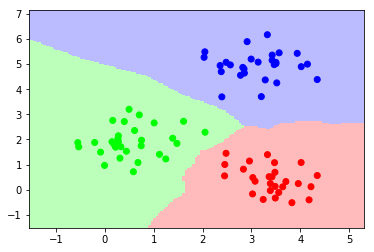

In [7]:
def generateTestMesh (trainData):
    trainData = np.array(trainData)
    data = np.matrix(trainData[:, 0])
    data = np.array(data.tolist()[0])   #Почему-то иначе оно не работало (планировалось trainData[:, 0, 0|1])
    x_min = min(data[:, 0]) - 1.0
    x_max = max(data[:, 0]) + 1.0
    y_min = min(data[:, 1]) - 1.0
    y_max = max(data[:, 1]) + 1.0
    h = 0.05
    testX, testY = np.meshgrid(np.arange(x_min, x_max, h),
                               np.arange(y_min, y_max, h))
    return [testX, testY]

k = 3
testX, testY = generateTestMesh (train)
testMeshLabels = classifyKNN (train, zip(testX.ravel(), testY.ravel()), k, nClasses)
classColormap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
testColormap = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
plt.pcolormesh(testX, testY,
              np.asarray(testMeshLabels).reshape(testX.shape),
              cmap=testColormap)
data = np.array(train)
data = np.matrix(data[:, 0])
data = np.array(data.tolist()[0])
plt.scatter(data[:, 0], data[:, 1],
           c=[train[i][1] for i in range(len(train))],
           cmap=classColormap)
plt.show()